<a href="https://colab.research.google.com/github/Jeppesmo/project/blob/main/Labour_Market%20-%20finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This is the notebook for the paper: 'Discrimination in the danish labour market', where the ethnicity among job applicants' effect on the probability of a callback is examined. This notebook contains all the statistical analysis as well as descriptions on how and why the different statistical techniques are used. Therefore this notebook should be seen as a complementary part to the paper and can be used to get a better understanding of the statistical methods used throughout the research. The methods used are for examining the following research question:

**Is there ethnical discrimination when job applicants apply for jobs in the Danish labour market and what factor does gender have?**

And the main hypothesis that is wanted to be examined in the research are:

**Null hypothesis, H0**: There is not a significant relation between ‘callback’ and ‘Minority’. This means that the ethnicity of an applicant does not affect their likelihood of a callback.

**Alternative hypothesis, H1**: There is a significant relation between ‘callback’ and ‘Minority’. This means that the ethnicity of an applicant does affect their likelihood of a callback.

## 1. Loading dataset

In [ ]:
# Loading packages
!pip install stargazer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import chisquare, chi2_contingency
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from stargazer.stargazer import Stargazer
sns.set_style("whitegrid")


In [ ]:
# Load the dataset (df) - referd to as dataframe from now on:
df = pd.read_csv('https://raw.githubusercontent.com/Jeppesmo/project/main/labour_market.csv')  # Read data from github CSV file

## 2. Data Cleaning

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   Minority  Female  callback Company_anonymous Industry_broad  Employees  \
0         0       0         0                a1         Retail       20.0   
1         0       0         0               a10    Health care       25.0   
2         0       1         0              a100    Health care       60.0   
3         0       1         0              a101         Retail        7.0   
4         1       1         0              a102         Retail       10.0   

   Private  Language_important  
0        1                   1  
1        0                   0  
2        0                   0  
3        1                   0  
4        1                   1  


In [ ]:
#Describes the numerical values:
round(df.describe(),2)

,Minority,Female,callback,Employees,Private,Language_important
count,400.0,400.00,400.00,398.00,400.00,400.00
mean,0.5,0.48,0.27,47.67,0.70,0.57
std,0.5,0.50,0.44,28.33,0.46,0.50
min,0.0,0.00,0.00,3.00,0.00,0.00
25%,0.0,0.00,0.00,25.00,0.00,0.00
50%,0.0,0.00,0.00,51.50,1.00,1.00
75%,1.0,1.00,1.00,62.00,1.00,1.00
max,1.0,1.00,1.00,205.00,1.00,1.00


This table shows a overview over the dataset with the function 'describe'. The table calculate the count, mean, standard deviation, the square roots and the minimum and maximun of the observations.

### 2.1 Inspection of the data provided:

In [ ]:
# Check the shape (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Check for datatypes and missing values
print(df.info())

Shape of the dataset: (400, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Minority            400 non-null    int64  
 1   Female              400 non-null    int64  
 2   callback            400 non-null    int64  
 3   Company_anonymous   400 non-null    object 
 4   Industry_broad      400 non-null    object 
 5   Employees           398 non-null    float64
 6   Private             400 non-null    int64  
 7   Language_important  400 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 25.1+ KB
None


From this we can conclude, that we have 400 entries, and 5 - int64, 2 - object and 1 float. This will be adressed later - for now we need to handle potential missing values (NA/NULL entries).

In [ ]:
# Check for the total number of missing values in each column
print(df.isnull().sum())

Minority              0
Female                0
callback              0
Company_anonymous     0
Industry_broad        0
Employees             2
Private               0
Language_important    0
dtype: int64


We can see, that the employees column have 2 missing vaules in Employees - to counteract that, and still be able to use the data, we choose to use the median of the data set, to counteract any outliers.

further more we want to convert the dtype into int64, so that the data do not contain .0, because a employee is binary (either they are there or they are not).


### 2.2 Handle Missing Values in Employees:

In [ ]:
# Calculate the median value for the 'Employees' column
median_employees = df['Employees'].median()

# Fill the missing values in the 'Employees' column with this median value
df['Employees'].fillna(median_employees, inplace=True)

#convert Employees in to int instead of float64
df['Employees'] = df['Employees'].astype(int)

# Check again for missing values to ensure that there are none left
print(df.isnull().sum())

Minority              0
Female                0
callback              0
Company_anonymous     0
Industry_broad        0
Employees             0
Private               0
Language_important    0
dtype: int64


### 2.3 Generate Summary Statistics:

In [ ]:
# Get an overview of the dataset (mean, median, standard deviation, etc.)
print(df.describe(include='all'))

          Minority      Female   callback Company_anonymous Industry_broad  \
count   400.000000  400.000000  400.00000               400            400   
unique         NaN         NaN        NaN               400              6   
top            NaN         NaN        NaN                a1         Retail   
freq           NaN         NaN        NaN                 1             98   
mean      0.495000    0.482500    0.26750               NaN            NaN   
std       0.500601    0.500319    0.44321               NaN            NaN   
min       0.000000    0.000000    0.00000               NaN            NaN   
25%       0.000000    0.000000    0.00000               NaN            NaN   
50%       0.000000    0.000000    0.00000               NaN            NaN   
75%       1.000000    1.000000    1.00000               NaN            NaN   
max       1.000000    1.000000    1.00000               NaN            NaN   

         Employees     Private  Language_important  
count   40

From the description of the data, we can conclude the following:

Minority, Female, Callback, Private and language_important are binary because there is no unique value, and the min is 0 and max is 1.

Employees to be interval data going from 3 to 205.

Company_anonymous have 400 unique values - and might not contribute to the analysis.

Industry_broad have 6 different unique values and can be categories using dummy values if needed - for now we will define the type as a category.

In [ ]:
# Drop the original 'company_anonymous' column
df = df.drop('Company_anonymous', axis=1)

In [ ]:
# Check unique values and their counts for categorical variables in 'Industry_broad'
print(df['Industry_broad'].value_counts())

Retail                       98
Construction & Extraction    81
Administrative support       66
Health care                  60
Education                    55
Sales & related              40
Name: Industry_broad, dtype: int64


Transform Data object in Industry_broad variables into category as follows:

In [ ]:
#df['Industry_broad'] = df['Industry_broad'].replace({'Administrative support': 1, 'Construction & Extraction': 2, 'Education': 3,'Health care': 4,'Retail': 5,'Sales & related': 6,}) # adds dummy values to the Industry_broad column
df['Industry_broad'] = df['Industry_broad'].astype('category')


df['Industry_broad'] # control for implamentation:


0           Retail
1      Health care
2      Health care
3           Retail
4           Retail
          ...     
395      Education
396         Retail
397         Retail
398         Retail
399    Health care
Name: Industry_broad, Length: 400, dtype: category
Categories (6, object): ['Administrative support', 'Construction & Extraction', 'Education', 'Health care',
                         'Retail', 'Sales & related']

# 3. Visualization of the data so far:

### 3.1 Employees histogram and boxplot

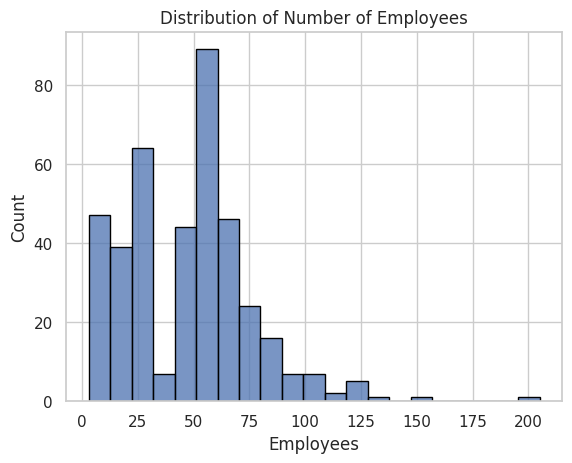

In [ ]:
# Histogram for 'Employees' column
sns.histplot(df['Employees'],edgecolor='black') # use seaborn to from the histogram
plt.title('Distribution of Number of Employees') # Set the title for the plot
plt.show() # Display it

The histogram gives a very unclear picture of the companies' size in relation to distribution, and potential outliers

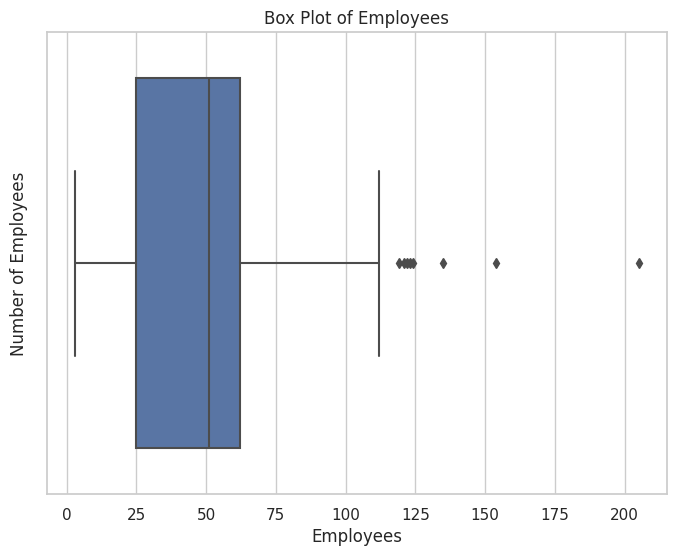

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6)) # Set the figure size
sns.boxplot(x=df['Employees']) # use seaborn to from the boxplot
plt.title('Box Plot of Employees') # Set the title for the plot
plt.ylabel('Number of Employees') # Label the y-axis
plt.show() # Display it

in order to deal with outliers in the data, we will categorize the companies according to the Danish standard in relation to size division within "SVM" as follows:

Micro: under 9 employees value=1

Small: between 10 and 49 employees value=2

Medium: between 50 and 99 employees value=3

Medium-large: between 100 and 249 employees value=4

Large: above and including 250 value=5

The new categorization will be a seperate column, so the old employees values still can be used if neccessary:



In [ ]:
# Define a function to categorize employees
def categorize_employees(num):
    if num <= 9:
        return 1  # micro category if 9 or under
    elif 10 <= num <= 49:
        return 2  # small category if between 10 and 49
    elif 50 <= num <= 99:
        return 3  # medium category if between 50 and 99
    elif 100 <= num <= 249:
        return 4  # medium-large category if between 100 and 249
    else:
        return 5  # large - In case companies are larger than 249


df['Employee_Category'] = df['Employees'].apply(categorize_employees)  # Apply the function and create a new column
print(df['Employee_Category'].value_counts()) #Control for implamentation

3    225
2    135
1     23
4     17
Name: Employee_Category, dtype: int64


### 3.2 Employee_category histograms

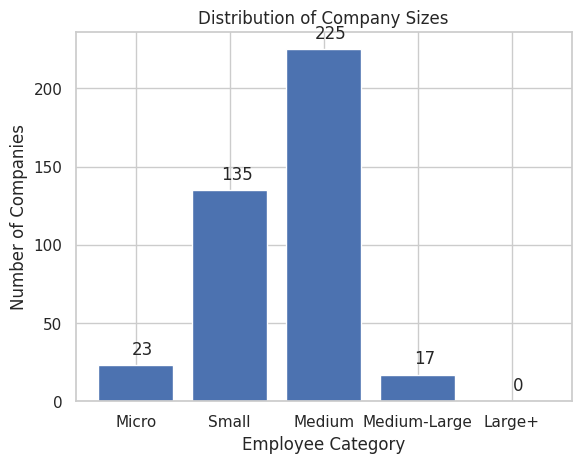

In [ ]:
# Histogram for the 'Employee_Category' column to see the distribution
counts, bins, patches = plt.hist(df['Employee_Category'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8) # count each occurrence and segment them in to bins for 1-6.


plt.xlabel('Employee Category') # Label the x-axis
plt.ylabel('Number of Companies') # Label the y-axis
plt.title('Distribution of Company Sizes') # Set the title for the plot
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Micro', 'Small', 'Medium', 'Medium-Large', 'Large+']) # bind bin with written category

# Display the count on top of each bar
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(bin, height), xytext=(5,5),
                 textcoords='offset points', ha='center', va='bottom')

plt.show() # Display it

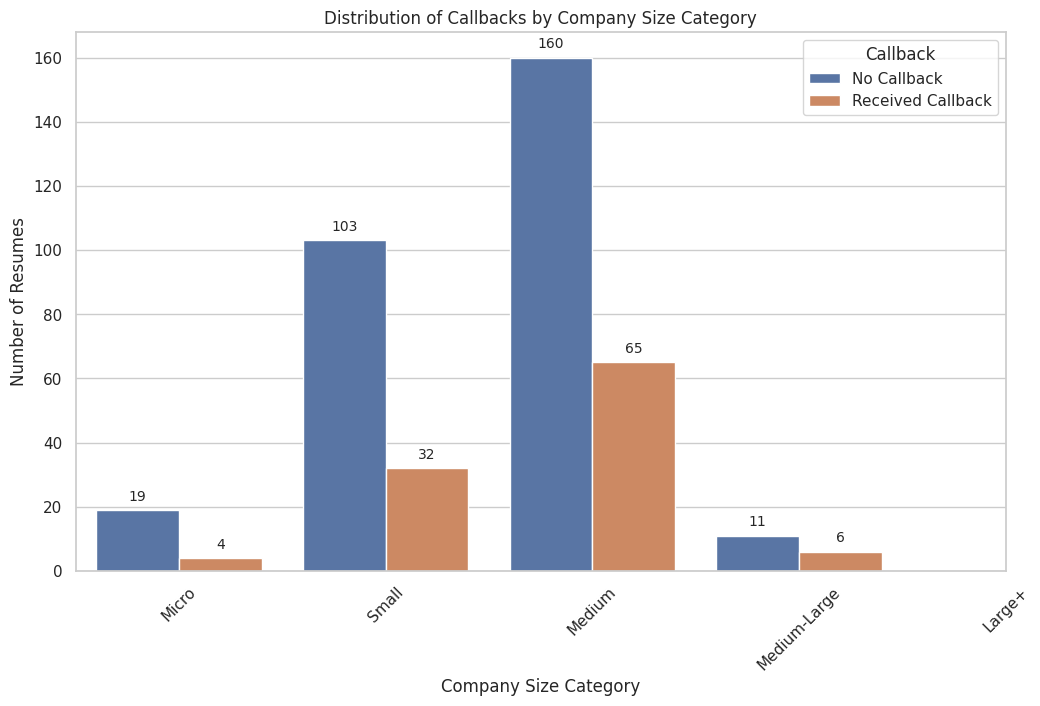

In [ ]:
# Create a bar plot to visualize the distribution of callback based on company size
plt.figure(figsize=(12, 7)) # Set the figure size
company_callback = sns.countplot(x='Employee_Category', hue='callback', data=df) # count each occurrence and segment them in to bins with weahter callback is 0 or 1


#add count to bar:
def add_counts_on_bars(company_callback):
    for p in company_callback.patches:
        height = p.get_height()
        company_callback.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center", fontsize=10)

add_counts_on_bars(company_callback)
plt.title('Distribution of Callbacks by Company Size Category') # Set the title for the plot
plt.xlabel('Company Size Category') # Label the x-axis
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Medium-Large', 'Large+']) # bind bin with written category
plt.xticks(rotation=45) # rotate text to make room
plt.ylabel('Number of Resumes') # Label the y-axis
plt.legend(title='Callback', labels=['No Callback', 'Received Callback']) # bind binary expession to written outcome
plt.show() # Display it

### 3.3 Industries visualizations

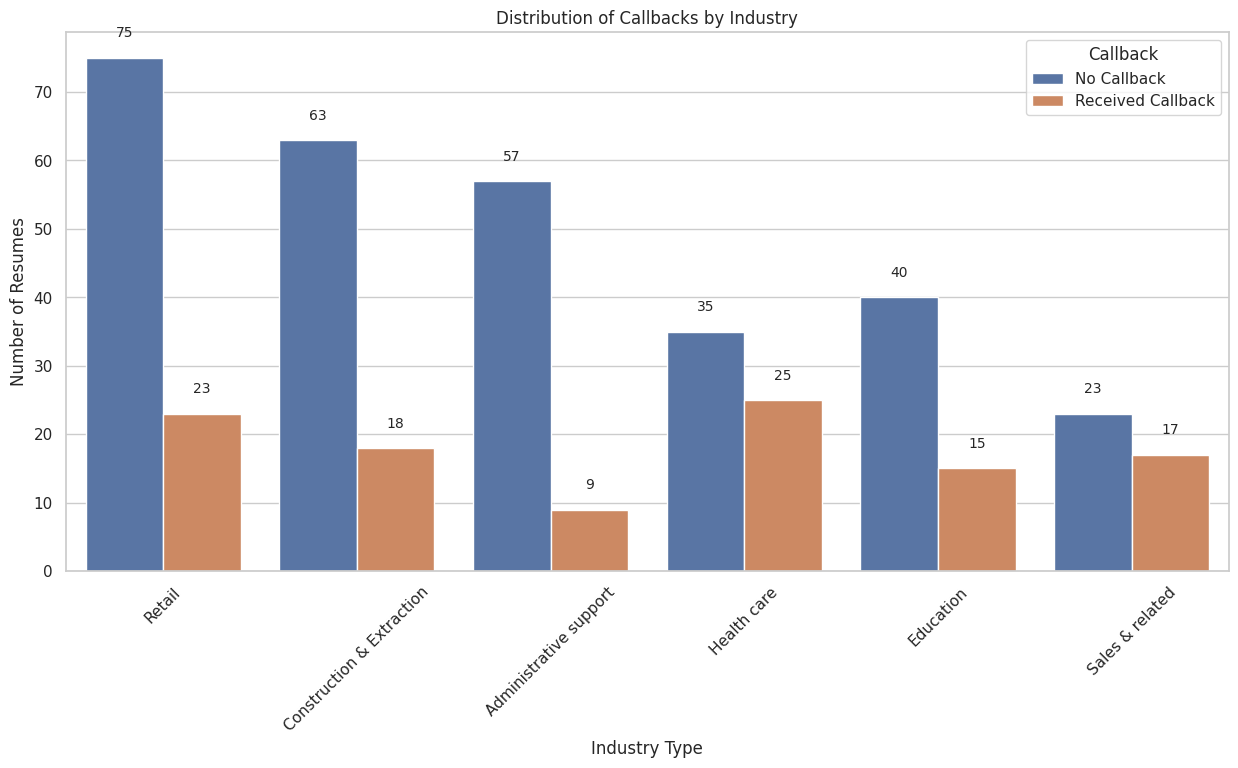

In [ ]:
# Load the dataset (figure) - with out dummy vaules to display names in figure correct:
figure = pd.read_csv('https://raw.githubusercontent.com/Jeppesmo/project/main/labour_market.csv')


# Create the bar plot
plt.figure(figsize=(15, 7)) # Set the figure size
labour = sns.countplot(x='Industry_broad', hue='callback', data=figure, order=figure['Industry_broad'].value_counts().index)  # Bar plot for 'Industry_broad' with hue based on 'callback'

#add count to bar:
def add_counts_on_bars(labour):
    for p in labour.patches:
        height = p.get_height()
        labour.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center", fontsize=10)
add_counts_on_bars(labour)

plt.title('Distribution of Callbacks by Industry') # Set the title for the plot
plt.xlabel('Industry Type') # Label the x-axis
plt.ylabel('Number of Resumes') # Label the y-axis
plt.xticks(rotation=45) # rotate text to make room
plt.legend(title='Callback', labels=['No Callback', 'Received Callback']) # bind binary expession to written outcome
plt.show() # Display it

### 3.4 Minority insigts (Visualisations)

### Minority vs majority bar chart

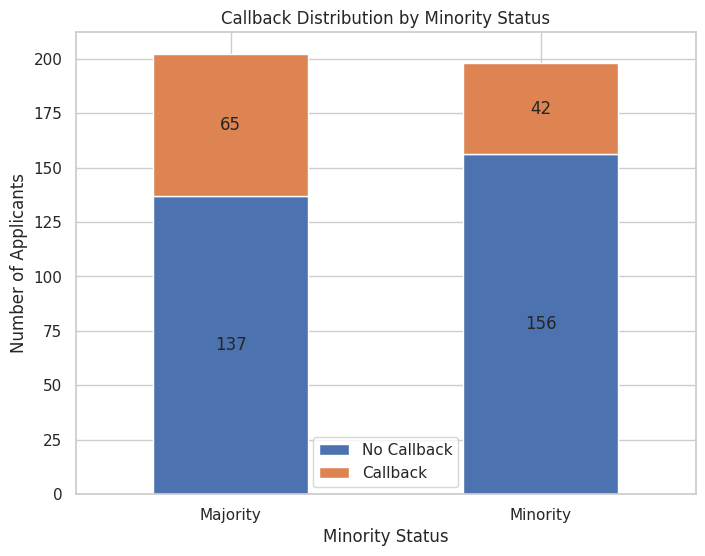

In [ ]:
# Contingency table for Minority and majority
contingency = pd.crosstab(df['Minority'], df['callback']) # segment into category

# Stacked bar chart
ax_minor = contingency.plot(kind='bar', stacked=True, figsize=(8, 6)) # defining the plot - using stacked to easier comparison on the two populations

plt.title('Callback Distribution by Minority Status') # Set the title for the plot
plt.xlabel('Minority Status') # Label the x-axis
plt.ylabel('Number of Applicants') # Label the y-axis
plt.xticks(ticks=[0,1], labels=['Majority', 'Minority'], rotation=0)  # bind bin with written category
handles_minor, labels_minor = ax_minor.get_legend_handles_labels() # Adjusting the labels for callbacks on the legend
ax_minor.legend(handles_minor, ['No Callback', 'Callback']) # setting the names

#add count to bar:
for p in ax_minor.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax_minor.text(x+width/2,
            y+height/2,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

plt.show() # Display it

### Minority across gender bar chart

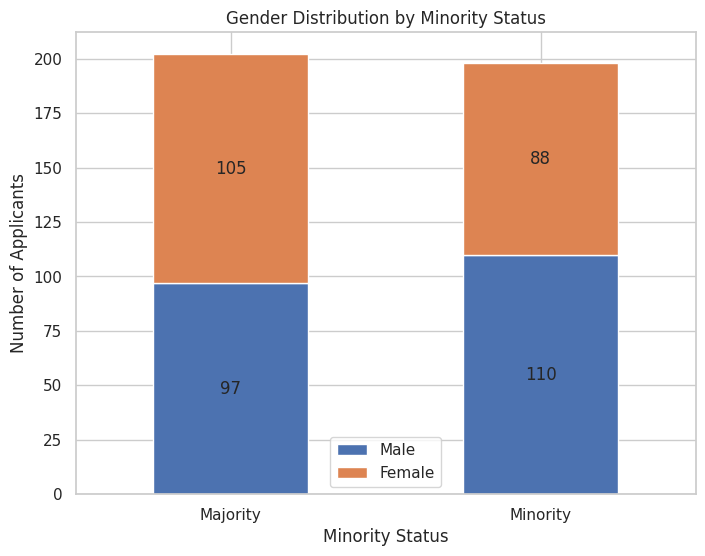

In [ ]:
# Contingency table for Minority and Female
contingency_gender = pd.crosstab(df['Minority'], df['Female']) # segment into category

# Stacked bar chart for Minority and Female
ax_gender = contingency_gender.plot(kind='bar', stacked=True, figsize=(8, 6)) # defining the plot - using stacked to easier comparison on the two populations
plt.title('Gender Distribution by Minority Status') # Set the title for the plot
plt.xlabel('Minority Status') # Label the x-axis
plt.ylabel('Number of Applicants') # Label the y-axis
plt.xticks(ticks=[0,1], labels=['Majority', 'Minority'], rotation=0) # bind bin with written category
handles_gender, labels_gender = ax_gender.get_legend_handles_labels() # Adjusting the labels for gender on the legend
ax_gender.legend(handles_gender, ['Male', 'Female']) # setting the names

#add count to bar:
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax_gender.text(x+width/2,
                   y+height/2,
                   '{:.0f}'.format(height),
                   horizontalalignment='center',
                   verticalalignment='center')
plt.show() # Display it

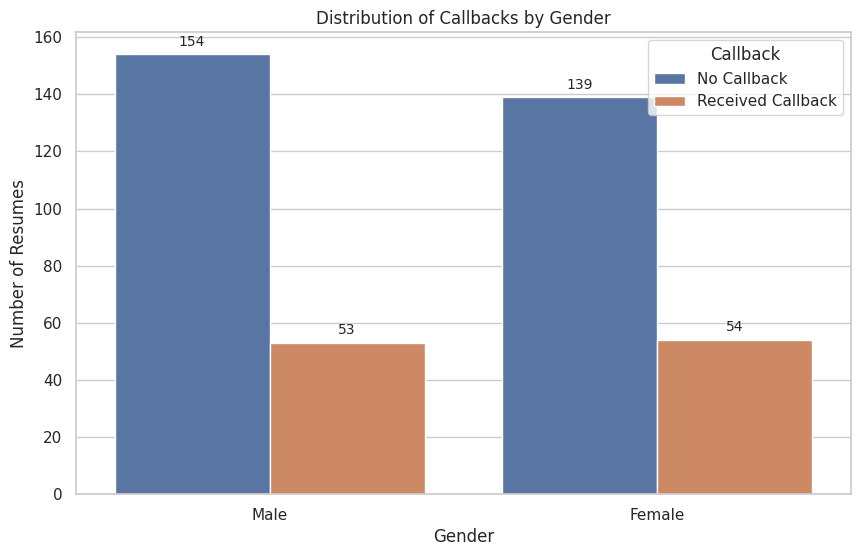

In [ ]:
#table for Minority and Female

plt.figure(figsize=(10, 6)) # Set the figure size
ax_gender_callback = sns.countplot(x='Female', hue='callback', data=df) # Bar plot for 'Female' with hue based on 'callback'
add_counts_on_bars(ax_gender_callback)
plt.title('Distribution of Callbacks by Gender') # Set the title for the plot
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], rotation=0)
plt.xlabel('Gender') # Label the x-axis
plt.ylabel('Number of Resumes') # Label the y-axis
plt.legend(title='Callback', labels=['No Callback', 'Received Callback']) # setting the names
plt.show() # Display it

### 3.5 Correlation within the dataset

<ipython-input-22-300c3e291630>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() #define expression


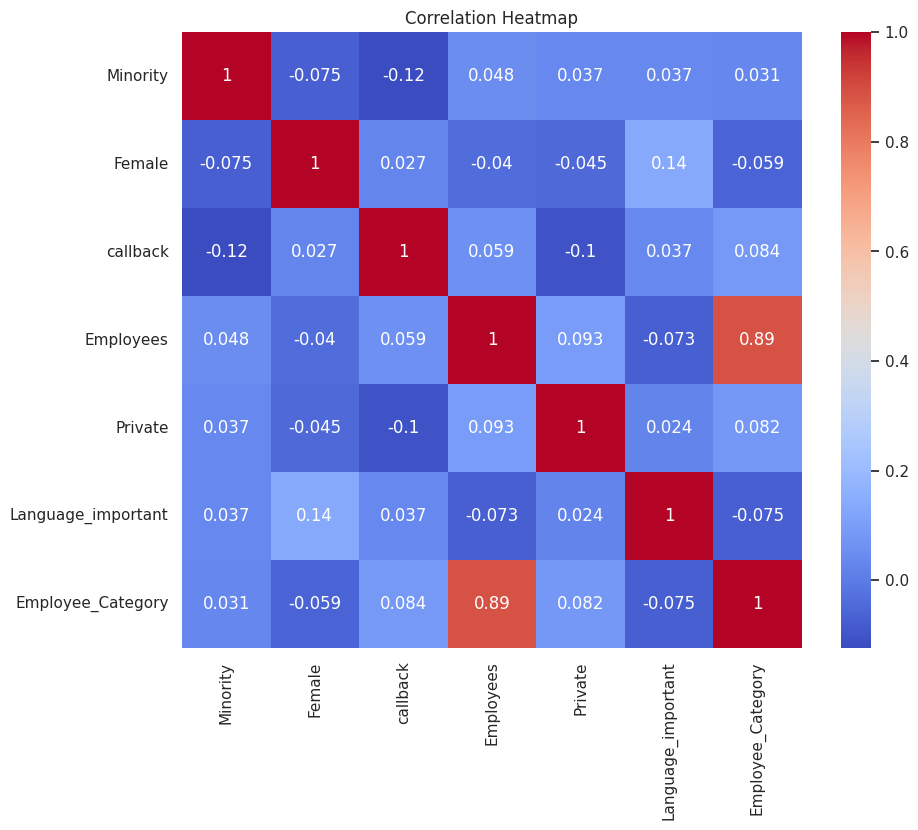

In [ ]:
#creating a heatmap
corr = df.corr() #define expression
sns.set(font_scale=1.0) # size of font
plt.figure(figsize=(10, 8)) # Set the figure size for the plot
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap') # Set the title for the plot
plt.show() # Display it

Interpretation:

We can see that there is a negative correlation between minority and the callback rate, and want to invistigate that further:


# 4. Testing the main hypothesis:

Main hypothesis (H0 and H1):

**Null hypothesis: There is not a significant relation between callback and Minority. This means that the ethnicity of an applicant does not affect their likelihood of a callback**

**Alternative hypothesis: There is a significant relation between callback and Minority. This meanss that the ethnicity of an applicant does affec their likelihood of a callbackt**

## 4.1 Chi-squared test of a contingency table - relationship between 'Minority' and 'callback'

We perform a chi-squared test to determine if there is enough evidence to infer that two binary variables are related. This test can be interpreted as a test to whether there are differences between 'Minority' and 'Majority' and the probability of getting a callback:


Significance level: ⍺ = 5%

### 4.1.1 Calculation of test statistic

The test statistic is found from the following:

$x^2 = \sum\frac{(f_i - e_i)^2}{e_i}$
, where:

$x^2$ = test statistic

$f_i$ = observed frequencies

$e_i$ = expected frequencies

**Explanation on how to calculate expected frequencies:**
As we assume that the null hypothesis is true we thus assume no relation between 'Minority' and 'callback'. Therefore the variables are assumed independent. We compute the expected values by getting the probabilities from our sample. It's basic probability math that is if two events are independent A & B the joint probability $P(A and B)$ is equal to $P(A) x P(B)$

Using relative frequencies, we can calculate the estimated joint probabilities of the outcomes between the two variables to therefore calculate the expected frequency of each outcome:

We have our observed frequencies:

|          | No callback | callback | Total   |
|----------|-------------|----------|---------|
| Majority | 137         | 65       | **202** |
| Minority | 156         | 42       | **198** |
| Total    | **293**     | **107**  | **400** |

Calculation of expected frequency of the cell in row 'i' and column 'j':


$$ e_i = \frac{row 'i' total * column 'j' total}{sample size} $$


|          | No callback             | callback               | Total   |
|----------|-------------------------|------------------------|---------|
| Majority | (202*293)/400 = 147.965 | (202*107)/400 = 54.035 | **202** |
| Minority | (198*293)/400 = 145.035 | (198*107)/400 = 52.965 | **198** |
| Total    | **293**                 | **107**                | **400** |

After we calculate total test statistic using:

$x^2 = \sum\frac{(f_i - e_i)^2}{e_i}$









In [ ]:
# The table should contain observed counts of callbacks for both groups: minority and non-minority
contingency_table = pd.crosstab(df['Minority'], df['callback']) #create cross-tabulation
contingency_table_df=pd.DataFrame(contingency_table) # makinging it into dataframe to be presentable with columns and index
contingency_table_df.columns = ["No Callback", "Callback"] # renameing 0 to "no callback" and 1 to "callback"
contingency_table_df.index = ["Majority", "Minority"] # renameing 0 to "majority" and 1 to "minority"

# Perform the chi-square test with chi2, p-value, degress of freedom and expected values:
chi2, p, dof, expected = chi2_contingency(contingency_table)


# Determine significance
alpha = 0.05

#print results from test with 4 digits
print("Observed frequencies:")
print(contingency_table_df)
print()
print("Expected frequencies:")
print(pd.DataFrame(expected, columns=["Callback", "No callback"], index=["Majority", "Minority"]))
print()
print(f"Chi2 value: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Alpha: {alpha}")
print()
print()
if p < alpha: #setting a rule to determin significance:
    print("There is a significant relation between 'Minority' and 'callback'.")
else:
    print("There is not a significant relation between 'Minority' and 'callback'.")



Observed frequencies:
          No Callback  Callback
Majority          137        65
Minority          156        42

Expected frequencies:
          Callback  No callback
Majority   147.965       54.035
Minority   145.035       52.965

Chi2 value: 5.5897
P-value: 0.0181
Degrees of freedom: 1
Alpha: 0.05


There is a significant relation between 'Minority' and 'callback'.


### 4.1.2 Interpretation of chi-squared test
To find out if we can reject the null hypothesis in favour of the alternative, we have to find the rejection region. When we have a 5% significance level the rejection region is:

Where ⍺ = 0.05

and v (DOF) = 1

$ x^2 > x^2,a,v = X^2,0.05,1 = 3.84  $

As our test statistic is 5.59 and thus greater than the critical value of 3.84, we can reject the null hypothesis and infer that there is a significant relation between ‘Minority’ and ‘callback’. This also means that whether an applicant is minority or majority it affects their likelihood of a callback. This is also confirmed from the p-value (0.018) < alpha (0.05).




## 4.2 Logistic Regression model

We now want to examine how much being a minority affect the probability of getting a callback. We use logistic regression because our dependent varible 'callback' is binary (outcome = 0/1). The logistic regression model will help giving an estimate on how much the variable 'Minority' affects the probability of getting a callback, when all other relevant variables are held constant.



### 4.2.1 Logistic regression model
Note: Also controlling for chosing variable 'employee_category' over 'employees' using logistic regression - we end up using the first model with the variable 'Employee_Category' - explanation coming later:

$$'callback'=y= log(\frac{p}{1-p}​)$$

$$callback=β_0+β_1(Minority)+β_2(Female)+β_3(EmployeeCategory)+β_4(Private)+β_5(LanguageImportant)$$


In [ ]:
#Logistic Regression analysis:
#using employee_category as variable

X = df[['Minority', 'Female', 'Employee_Category', 'Private', 'Language_important',]] #setting value x to include columns presented
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = df['callback'] #defining the dependend variable
model = sm.Logit(y, X).fit()
print(model.summary())


# Coefficients binding to "b" value
b0 = model.params['const']
b1 = model.params['Minority']
b2 = model.params['Female']
b3 = model.params['Employee_Category']
b4 = model.params['Private']
b5 = model.params['Language_important']


print(f"callback = {b0:.4f} + {b1:.4f} * Minority + {b2:.4f} * Female  + {b3:.4f} * Employee_Category+ {b4:.4f} * Private+ {b5:.4f} * Language_important" ) # print our logit regression

Optimization terminated successfully.
         Current function value: 0.562093
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               callback   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                 0.03214
Time:                        09:31:42   Log-Likelihood:                -224.84
converged:                       True   LL-Null:                       -232.30
Covariance Type:            nonrobust   LLR p-value:                   0.01066
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4971      0.546     -2.744      0.006      -2.567      -0.428
Minor

### 4.2.2 Interpretation on Full model:

Full model:
$$callback=-1.4971-0.5755(Minority)+0.0542(Female)+0.3604(EmployeeCategory)-0.5217(Private)+0.2348(Languageimportant)$$

**Key results:**

Pseudo R-square value = 0.03214, which means that our independent variables at least can explain 3.2 pct of the variation in ‘callback’. The rest is explained by other variables not included in the model.  

LLR p-value = 0.01066, which is a lot below the significance level of 0.05. This suggests that the model is very significant in explaining the likelihood of a job applicant getting a callback based on the variables included.  

Focusing on the independent variable ‘Minority’ the model suggests that the ethnicity of the job applicant has significant influence on the likelihood of getting a callback (p-value: 0.014 < ⍺: 0.05). The interpretation of the coefficient of the ‘Minority’-variable (-0.5755), are in log-odds terms. To get a more distinct interpretation a marginal effects computation is used, as that gives a more transparent measure (Notebook section 4.3). It shows the change in outcome ‘callback’ as a function of the change in the independent variable. Marginal effects are thus interpreted in the same way as coefficients in linear regression is interpreted.

In [ ]:
#Logistic Regression analysis:
#using employees as variable for comparrison on the two varriabels:

X = df[['Minority', 'Female', 'Employees', 'Private', 'Language_important']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = df['callback']
model1 = sm.Logit(y, X).fit()
print(model1.summary())


# Coefficients binding to "b" value
b0 = model.params['const']
b1 = model.params['Minority']
b2 = model.params['Female']
b3 = model.params['Employee_Category']
b4 = model.params['Private']
b5 = model.params['Language_important']


print(f"callback = {b0:.4f} + {b1:.4f} * Minority + {b2:.4f} * Female  + {b3:.4f} * Employee_Category+ {b4:.4f} * Private+ {b5:.4f} * Language_important" ) # print our logit regression

Optimization terminated successfully.
         Current function value: 0.564158
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               callback   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                 0.02858
Time:                        09:31:42   Log-Likelihood:                -225.66
converged:                       True   LL-Null:                       -232.30
Covariance Type:            nonrobust   LLR p-value:                   0.02090
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8549      0.333     -2.571      0.010      -1.507      -0.203
Minor

### 4.2.3 Compare with Employees not categorised:

Comparison of Employee_Category vs Employees in Logit Regression Models:

Pseudo R-squared:

Employee_Category Model: The Pseudo R-squared value is 0.03214.

Employees Model: The Pseudo R-squared value is 0.02858.

Interpretation: The model with Employee_Category has a slightly higher Pseudo R-squared value, indicating that it might account for a bit more of the variability in the response variable, callback.

Favor: Employee_Category


---


Log-Likelihood:

Employee_Category Model: The log-likelihood value is -224.84.

Employees Model: The log-likelihood value is -225.66.

Interpretation: The higher log-likelihood value in the Employee_Category model indicates a slightly better fit to the data.

Favor: Employee_Category



---


Coefficients and Their Significance:

For Employee_Category:

Coefficient: 0.3604 - p-value: 0.046

For Employees:

Coefficient: 0.0064 - p-value: 0.116

Interpretation:
Employee_Category are a siginificant predictor with it's p-value being 0.046, in comparision with Employees p-value being 0.116 demeed not siginificant.
The coefficient for Employees is much smaller, suggesting a weaker association with the response variable compared to Employee_Category. It should be stated that the Employee_Category in colse to the alpha (0.05) and could could be seen as a borderline value in some instances.

Favor: Employee_Category.


---


In conclusion, based on the metrics provided from the two regression models, the Employee_Category model appears to offer a slightly better fit to the data and a stronger association with the response variable, callback, compared to the Employees model.



### 4.2.4 Odds ratios
Here we are going to transform the log-odds from the previous model into odds ratio. The odds ratio is a representation of the multiplicative change in the odds when the binary predictor variable outcome changes form 0-1.

Because of the data manipulation, the employee_category i rangeing from 1-5, and therefore not a binary value, but a representation of the size scale of the company where 1 being the smallest - it also not meaningfull for our research qustion to do a deeper interpretation of the category for now:

In [ ]:
print(np.exp(model.params))  # preform odds ratio calculation

const                 0.223775
Minority              0.562438
Female                1.055692
Employee_Category     1.433840
Private               0.593504
Language_important    1.264672
dtype: float64


Minority (0.5624): When holding all other variables constant, the odds of a callback when a minority compared to the majority is 56,24%. This means that the minority group and individuals have a lower odds compared to the majority.

odds for the majority: $1/0.5624 = 1.7780$

Female (1.0556): suggest that females have a slightly better odds (5,56%) of receving a callback compared with males.

Odds for Males: $1/1.0556 = 0.9473$


## 4.3 Marginal Effects Computation on model

In [ ]:
formula = 'callback ~ Minority + Female + Employee_Category + Private + Language_important ' # Defining our y value and our x values
model = sm.Logit.from_formula(formula, data=df).fit()
ame = model.get_margeff(at='overall', method='dydx') #using the overall, the average of the marginal effects at each observation, with dydx where no fransformation is made and marginal effects are returned.
print(ame.summary()) # Display it


Optimization terminated successfully.
         Current function value: 0.562093
         Iterations 5
        Logit Marginal Effects       
Dep. Variable:               callback
Method:                          dydx
At:                           overall
                        dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Minority              -0.1085      0.043     -2.523      0.012      -0.193      -0.024
Female                 0.0102      0.044      0.233      0.816      -0.076       0.096
Employee_Category      0.0680      0.034      2.024      0.043       0.002       0.134
Private               -0.0984      0.045     -2.184      0.029      -0.187      -0.010
Language_important     0.0443      0.044      0.997      0.319      -0.043       0.131


### 4.3.1 Interpretation on marginal effects:

Focussing on the ‘Minority’ row, the marginal effect is the dy/dx value (-0.01085). This can be interpreted as being a minority applicant decreases the probability of a callback by 10.85 pct. points. The 95 pct. confidence interval at the far right of the table [0.025 - 0.975], is [–0.193;-0.024], suggests that with 95 pct. certainty it can be inferred that the Minority has between 2.4 pct. points to 19.3 pct. points less probability of getting a callback compared to the majority. This result contributes to the result of the chi-squared about the first hypothesis which is that in can be inferred that there is a significant relation between ‘callback’ and ‘Minority’. This means that the ethnicity of an applicant does affect the likelihood of a callback. To elaborate a minority applicant is less likely to get a callback than a majority applicant.  

All other independent variables can also be interpreted as the marginal effect of a one unit change e.g. a one unit change in 'Private' (Public vs private company) the dy/dx value show that an applicant applying for a job in a private company is 9.84 pct.-points less likely to get a callback than an applicant in a public company


## 4.4 Accuracy on the data:



In [ ]:
# Fitting the logistic regression model on the entire data
formula = 'callback ~ Minority + Employee_Category + Private + Language_important'
model = sm.Logit.from_formula(formula, data=df).fit()

# Predicting on the entire dataset using the model
prediction = model.predict(exog=df)

# Define the cutoff for classification
cutoff = 0.5

# Computing class predictions for the entire dataset
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the entire dataset
y_actual = df['callback']

# Compute and print confusion matrix using crosstab function for the entire dataset
conf_matrix = pd.crosstab(y_actual, y_prediction, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Computing accuracy for the entire dataset
accuracy = accuracy_score(y_actual, y_prediction)

# Print the confusion matrix and accuracy for the entire dataset
print('Matrix and accuracy for the entire dataset')
print(conf_matrix)
print('Accuracy on Entire Dataset: {:.2f}%'.format(accuracy * 100))

print() #print a blank line

# Splitting the dataset into training and test sets and using 70% to train the data on based on the relatively small sample size.
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Fitting the logistic regression model on the training data
model_train = sm.Logit.from_formula(formula, data=train).fit()

# Predicting on the test set using model_train
prediction_t = model_train.predict(exog=test)

# Computing class predictions for the test set
y_prediction_t = np.where(prediction_t > cutoff, 1, 0)

# Assign actual class labels from the test set
y_actual_t = test['callback']

# Compute and print confusion matrix using crosstab function for the test set
conf_matrix_t = pd.crosstab(y_actual_t, y_prediction_t, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Computing accuracy for the test set
accuracy_t = accuracy_score(y_actual_t, y_prediction_t)

# Print the confusion matrix and accuracy for the test set
print('Matrix and accuracy for the test dataset')
print(conf_matrix_t)
print('Accuracy on Test Set: {:.2f}%'.format(accuracy_t * 100))


Optimization terminated successfully.
         Current function value: 0.562161
         Iterations 5
Matrix and accuracy for the entire dataset
Predicted    0  1  All
Actual                
0          292  1  293
1          107  0  107
All        399  1  400
Accuracy on Entire Dataset: 73.00%

Optimization terminated successfully.
         Current function value: 0.545968
         Iterations 6
Matrix and accuracy for the test dataset
Predicted    0  1  All
Actual                
0           85  3   88
1           32  0   32
All        117  3  120
Accuracy on Test Set: 70.83%


### 4.4.1 Interpretation of the accuracy
Full dataset:

Function value: 0.5621

Matrix: out of 293 non callback the model predicted 292 correctly, and 1 was mistaken as callback - which on it is own is a fine prediction value. But when the model tries to predict callback (1 value) it predicted 107 wrongfully and managed to get zero correctly.

Accuracy: 73.0%

Test dataset:

function value: 0.5459

Matrix: out of 88 non callback the model predicted 85 correctly, and 3 was mistaken as callback - which also is a fine prediction value. But also here we see the model stuggle to predict callback. out of 32 callback the model manged to correctly predict zero, and 32 was mistaken.

Accuracy: 68.33%

Conclusion:
Both the full model and the test model both struggle to predict a correct callback. This could be explained by the diffrence between callback (293 total) and non callback (107 total) rate. Therefore, if the dataset should be used to predict callback, the results would be deemed as not valid from the lack of ability to correctly predict callback, or would need further manipulation to get a usefull outcome.


**Note: the values may differ because of the randomnation in the test and when the model i run.**


# 5. Sub-Hypotheses - difference among gender and the ethnical discrimination:

Having supported H1 it is now relevant to examine if both genders are exposed to the same degree og ethnical discrimination.

**Null Hypothesis, Hs0:**  There is no interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback. This means that a minority applicants’ probability of a callback does not change based on the gender of the applicant

**Alternative hypothesis, H1:**  There is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback. This means that a minority applicants’ probability of a callback compared to the majority does change based on the gender of the applicant


### 5.1 Chi-squared test for interaction: relationship between 'Minority x Female' and 'callback'

Significance level = 0.05

### 5.1.1 Calculation of test statistic:

The test statistic is found from the following:

$x^2 = \sum\frac{(f_i - e_i)^2}{e_i}$
, where:

$x^2$ = test statistic

$f_i$ = observed frequencies

$e_i$ = expected frequencies

We have our observed frequencies:

|                 | No callback | callback | **Total** |
|-----------------|-------------|----------|-----------|
| Majority/male   | 62          | 35       | **97**    |
| Majority/female | 75          | 30       | **105**   |
| Minority/male   | 92          | 18       | **110**   |
| Minority/female | 64          | 24       | **88**    |
| **Total**       | **293**     | **107**  | **400**   |

Calculation of expected frequency of the cell in row 'i' and column 'j':

$ e_i = \frac{row 'i' total * column 'j' total}{sample size} $

|                 | No callback           | callback              | **Total** |
|-----------------|-----------------------|-----------------------|-----------|
| Majority/male   | (97*293)/400 = 71.05  | (97*107)/400 = 25.95  | **97**    |
| Majority/female | (105*293)/400 = 76.91 | (105*107)/400 = 28.09 | **105**   |
| Minority/male   | (110*293)/400 = 80.58 | (110*107)/400 = 29.43 | **110**   |
| Minority/female | (88*293)/400 = 64.46  | (88*107)/400 = 23.54  | **88**    |
| **Total**       | **293**               | **107**               | **400**   |


In [ ]:
# Create a contingency table for observed counts of callbacks based on Minority status and Gender
contingency_table_interaction = pd.crosstab([df['Minority'], df['Female']], df['callback'])

# Perform the chi-square test
chi2_interaction, p_interaction, dof_interaction, expected_interaction = chi2_contingency(contingency_table_interaction)

# Determine significance
alpha = 0.05

# Display results
contingency_display = pd.DataFrame(contingency_table_interaction)
contingency_display.columns = ["No Callback", "Callback"]

print("Frequencies based on Minority status and Gender:")
print(contingency_display)
print()
print()
print("Expected frequencies:")
print(pd.DataFrame(expected_interaction, columns=["No Callback", "Callback"], index=contingency_display.index))
print(f"Chi2 value: {chi2_interaction:.4f}")
print(f"P-value: {p_interaction:.4f}")
print(f"Degrees of freedom: {dof_interaction}")
print(f"Alpha: {alpha}")
print()
print()
if p_interaction < alpha:
    print("There is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback")
else:
    print("there is not an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback")


Frequencies based on Minority status and Gender:
                 No Callback  Callback
Minority Female                       
0        0                62        35
         1                75        30
1        0                92        18
         1                64        24


Expected frequencies:
                 No Callback  Callback
Minority Female                       
0        0           71.0525   25.9475
         1           76.9125   28.0875
1        0           80.5750   29.4250
         1           64.4600   23.5400
Chi2 value: 10.5576
P-value: 0.0144
Degrees of freedom: 3
Alpha: 0.05


There is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback


### 5.1.2 Interpretation of chi-squared test
To find out if we can reject the null hypothesis in favour of the alternative, we have to find the rejection region. When we have a 5% significance level the rejection region is:

Where ⍺ = 0.05

and v (DOF) = 3

$ x^2 > x^2,a,v = X^2,0.05,3 = 7.81  $

As our test statistic 10.5576 > 7.81, we can reject the null hypothesis and support the alternative hypothesis which is that there is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback. This is also confirmed from the p-value (0.0144) < alpha (0.05).

### 5.1.3 visual presentation of callback rate across gender and ethnicity

In [ ]:
#probability:

# Calculate callback rate for Majority Males
majority_males = df[(df['Minority'] == 0) & (df['Female'] == 0)]
majority_males_callback = (sum(majority_males['callback']) / len(majority_males)) * 100

# Calculate callback rate for Majority Females
majority_females = df[(df['Minority'] == 0) & (df['Female'] == 1)]
majority_females_callback = (sum(majority_females['callback']) / len(majority_females)) * 100

# Calculate callback rate for Minority Males
minority_males = df[(df['Minority'] == 1) & (df['Female'] == 0)]
minority_males_callback= (sum(minority_males['callback']) / len(minority_males)) * 100

# Calculate callback rate for Minority Females
minority_females = df[(df['Minority'] == 1) & (df['Female'] == 1)]
minority_females_callback = (sum(minority_females['callback']) / len(minority_females)) * 100


print(f"majority males callback: {majority_males_callback:.2f} %")
print(f"majority females callback: {majority_females_callback:.2f} %")
print(f"minority males callback: {minority_males_callback:.2f} %")
print(f"minority females callback: {minority_females_callback:.2f} %")



majority males callback: 36.08 %
majority females callback: 28.57 %
minority males callback: 16.36 %
minority females callback: 27.27 %


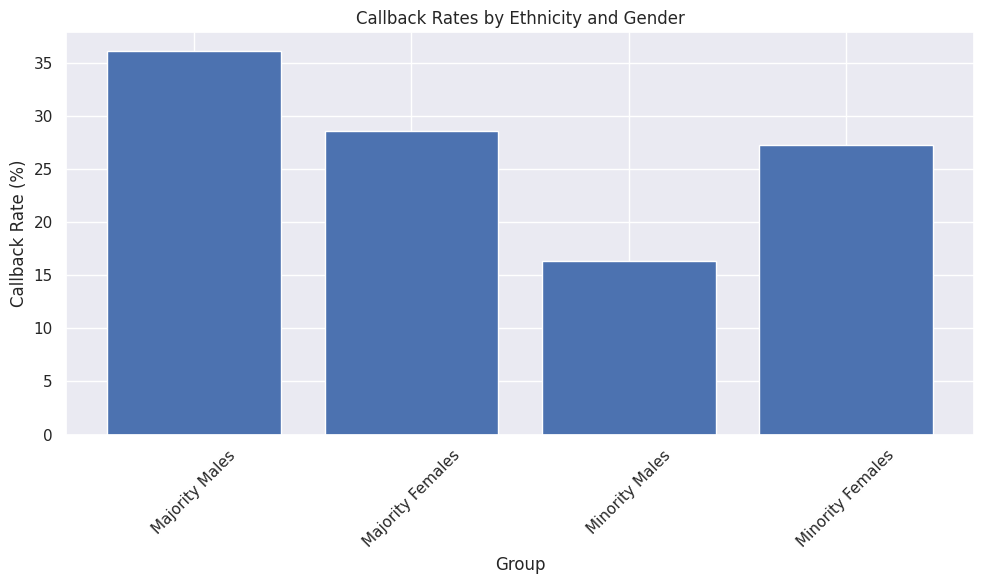

In [ ]:
groups = ['Majority Males', 'Majority Females', 'Minority Males', 'Minority Females']
rates = [majority_males_callback, majority_females_callback, minority_males_callback, minority_females_callback]

plt.figure(figsize=(10, 6))
plt.bar(groups, rates)
plt.title("Callback Rates by Ethnicity and Gender")
plt.ylabel("Callback Rate (%)")
plt.xlabel("Group")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5.2 Logistic regression model of interaction between ('Minority' x 'Female') and 'callback'

We now want to examine exactly how much ethnicity and gender combined affects the probability of callback, or basically if ethnical discriminatinon occours for both genders. As our dependent variable 'callback' is still binary (0/1) a logistic regression model is applied.

We now use a logistic regression model with an interaction. This is because one we now want to examine the effect of one of our independent variables 'Minority' when it depends on the value of the variable 'Female'

Therefore we include an interaction term in our model which basically is an independent variable formed by multiplying the two ordinary independent variables 'Minority' and 'Female'. The model then becomes:

$$ logit (P(Y=1)) = β_0+β_1(Minority)+β_2(Female)+β_3(Minority × Female)  $$

In [ ]:
#see the interaction:

#to do this we need to create the interaction by multiplying the two variabels:
df['Minority_female']=df['Minority']*df['Female']

X = df[['Minority', 'Female', 'Minority_female']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = df['callback']
model2 = sm.Logit(y, X).fit()
print(model2.summary())


# Coefficients
b0 = model2.params['const']
b1 = model2.params['Minority']
b2 = model2.params['Female']
b3 = model2.params['Minority_female']


print(f"callback = {b0:.4f} + {b1:.4f} * Minority + {b2:.4f} * Female + {b3:.4f} * Minority_female" )

Optimization terminated successfully.
         Current function value: 0.567078
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               callback   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                 0.02355
Time:                        09:31:43   Log-Likelihood:                -226.83
converged:                       True   LL-Null:                       -232.30
Covariance Type:            nonrobust   LLR p-value:                   0.01204
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5718      0.211     -2.704      0.007      -0.986      -0.157
Minority      

Full model with coefficients:

$$ logit (P(Y=1)) = -0.5718-1.0596(Minority)-0.3445(Female)+0.9951(Minority × Female)$$

Interpretation on model:
As our model is a logistic regression model with a binary variable as outcome, the coefficient should still be interpreted as log-odds. When an interaction term is used the coefficients in our model cannot be fully interpreted the normal way. One thing that is useful from the results is the p-value of our interaction term-variable ‘Minority_Female’. The p-value of this variable is 0.032 and < ⍺. This indicates that the effect of ‘Minority’ on ‘callback’ is not the same for all values of ‘Female’, which means that the gender affects how much the ethnicity affects the likelihood of a callback.

The Pseudo R-square is 0.02355 which tells that the independent variables included has little explanatory power to the variation of the dependent variable ‘callback’.  

LLR p-value = 0.01204, which is a lot below the significance level of 0.05. This suggests that the model is significant in explaining the likelihood of a job applicant getting a callback.

## 5.2.1 log-odds of receiving a callback

| Female\Minority 	| Majority (0)                                                        	| Minority (1)                                                                                                                	|
|-----------------	|---------------------------------------------------------------------	|-----------------------------------------------------------------------------------------------------------------------------	|
| Male (0)        	| $b_0$ <br>Const =<br>-0.5718                                        	| $b_0 + b_1$<br>Const + Minority  = <br>-0.5718 + -1.0596 =<br>-1.6314                                                       	|
| Female (1)      	| $b_0 + b_2$<br>Const + Female   = <br>-0.5718 + -0.3445 =<br>-0.9163 	| $b_0 + b_1 + b_2 + b_3$<br>Const + Minority + female + Interaction = <br>-0.5718 + -1.0596 + -0.3445 + 0.9951 = <br>-0.9808 	|

|   | Minority value | Female value | Explanation     | log(P(Y=1))       | log odds |
|---|----------------|--------------|-----------------|-------------------|----------|
| 1 | 0              | 0            | Majority male   | β0                | -0.5718  |
| 2 | 1              | 0            | Minority male   | β0 + β1           | -1.6314  |
| 3 | 0              | 1            | Majority female | β0 + β2           | -0.9163  |
| 4 | 1              | 1            | Minority female | β0 + β1 + β2 + β3 | -0.9808  |

Interpretation of results:
The table show when comparing Majority vs Minority among males the log-odds ratio is β1 = -1.0596. This result indicates that minority males have far less log-odds of callback than majority males. Comparing Majority vs Minority among females the log-odds ratio is β1+β3 = -0.0645. Which indicates that in the female category the minority actually have nearly the same log-odds of callback than the majority. When comparing male vs female among minorities the log-odds ratio is β2+β3 = 0,6505 which indicates that female minorities have better log-odds of getting a callback than male minorities.  

These results combined with the fact that we have a significant interaction variable it supports the alternative hypothesis Hs1 and is sufficient evidence to infer that there is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback. This means that a minority applicants’ probability of a callback compared to the majority does change based on the gender of the applicant. The results show that male minorities have a weaker probability of callback compared to the majority males whereas the probability are more even among majority vs minority females.  

### 5.3 Logisitic regression with interaction term - full model:



Full model: (Interaction term included) instead of using our simple model we use the model with all other variables included and then add the interaction term

$$ callback = y$$

$$ logit (P(Y=1)) = β_0+β_1(Minority)+β_2(Female)+β_3(EmployeeCategory)+β_4(Private)+β_5(LanguageImportant)+β_6(Minority × Female)  $$

In [ ]:
#Logistic Regression analysis:

df['Minority_female']=df['Minority']*df['Female']

#using employee_category as variable

X = df[['Minority', 'Female', 'Employee_Category', 'Private', 'Language_important', 'Minority_female']] #setting value x to include columns presented
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = df['callback'] #defining the dependend variable
model3 = sm.Logit(y, X).fit()
print(model3.summary())


# Coefficients binding to "b" value
b0 = model3.params['const']
b1 = model3.params['Minority']
b2 = model3.params['Female']
b3 = model3.params['Employee_Category']
b4 = model3.params['Private']
b5 = model3.params['Language_important']
b6 = model3.params['Minority_female']


print(f"callback = {b0:.4f} + {b1:.4f} * Minority + {b2:.4f} * Female  + {b3:.4f} * Employee_Category+ {b4:.4f} * Private+ {b5:.4f} * Language_important + {b6:.4f} * Minority_female" ) # print our logit regression

Optimization terminated successfully.
         Current function value: 0.556858
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               callback   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                 0.04115
Time:                        09:31:44   Log-Likelihood:                -222.74
converged:                       True   LL-Null:                       -232.30
Covariance Type:            nonrobust   LLR p-value:                  0.003968
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2809      0.553     -2.316      0.021      -2.365      -0.197
Minor

Full model with coefficients:

$$ logit (P(Y=1)) = -1.2809-1.0535(Minority)-0.3547(Female)+0.3545(EmployeeCategory)-0.5070(Private)+0.2290(LanguageImportant)+0.9555(Minority × Female)  $$


### 5.3.1 log-odds of receiving a callback on the full model

| Female\Minority 	| Majority (0)                                                        	| Minority (1)                                                                                                                	|
|-----------------	|---------------------------------------------------------------------	|-----------------------------------------------------------------------------------------------------------------------------	|
| Male (0)        	| $b_0$ <br>Const =<br>-1.2809                                        	| $b_0 + b_1$<br>Const + Minority  = <br>-1.2809 + -1.0535 =<br>-1.6314                                                       	|
| Female (1)      	| $b_0 + b_2$<br>Const + Female   = <br>-1.2809 + -0.3547 =<br>-0.9163 	| $b_0 + b_1 + b_2 + b_6$<br>Const + Minority + female + Interaction = <br>-1.2809 + -1.0596 + -0.3547 + 0.9955 = <br>-0.9808 	|

Table for interpreting coefficients for full model:

|   | Minority value | Female value | Explanation     | log(P(Y=1))       | log odds |
|---|----------------|--------------|-----------------|-------------------|----------|
| 1 | 0              | 0            | Majority male   | β0                | -1.2809  |
| 2 | 1              | 0            | Minority male   | β0 + β1           | -2.3344  |
| 3 | 0              | 1            | Majority female | β0 + β2           | -1.6356  |
| 4 | 1              | 1            | Minority female | β0 + β1 + β2 + β6 | -1.7336  |

Table for comparing simple model with full model

|   | Minority value | Female value | Explanation     | log(P(Y=1)) (Simple Model) | log odds (Simple Model) | log(P(Y=1)) (Full Model)                          | log odds (Full Model) | Difference |
|---|----------------|--------------|-----------------|---------------------------|------------------------|-------------------------------------------------|-----------------------|------------|
| 1 | 0              | 0            | Majority male   | β0                        | -0.5718                | β0                                                | -1.2809               | -0.7091    |
| 2 | 1              | 0            | Minority male   | β0 + β1                   | -1.6314                | β0 + β1                                           | -2.3344               | -0.7030    |
| 3 | 0              | 1            | Majority female | β0 + β2                   | -0.9163                | β0 + β2                                           | -1.6356               | -0.7193    |
| 4 | 1              | 1            | Minority female | β0 + β1 + β2 + β3         | -0.9808                | β0 + β1 + β2 + β6                                 | -1.7336               | -0.7528    |
             |


### 5.3.2. Interpretation of results

The table show when comparing majority vs minority among males, the log-odds ratio is β1 = -1.0535 and this result indicates that minority males have far less log-odds of callback than majority males. Comparing majority vs minority among females the log-odds ratio is β1+β6 = -0.098. Which indicates that in the female category the minority actually have nearly the same log-odds of callback than the majority. When comparing male vs female among minorities the log-odds ratio is β2+β6 = 0,6008 which indicates that female minorities have better log-odds of getting a callback than male minorities.  

These results combined with the fact that we have a significant interaction variable it supports the alternative hypothesis, Hs1. Thus, there is sufficient evidence to infer that there is an interaction effect between gender 'Female' and ethnicity 'Minority' on the likelihood of receiving a callback. This means that a minority applicants’ probability of a callback compared to the majority does change based on the gender of the applicant. The results show that male minorities have a weaker probability of callback compared to the majority males whereas the probability are more even among majority vs minority females.  

When comparing the simple model with the full model the most noticeable difference is the Pseudo r-square value which increases quite a bit. This means that the variables included in the full model helps explaining the variation in 'callback'. However when we focus among the differences across Minority/majority and gender the results are quite similar as it is still clear that male minorities are at most disadvantage where majority vs minority females is a more even contest.

## 5.4 stargazer output
Presenting models in stargazer


In [ ]:
star_X = df[['Minority', 'Female', 'Employee_Category','Private','Language_important']]
star_X = sm.add_constant(star_X)
star_model = sm.Logit(y, star_X)
star_result = star_model.fit()

star_X1 = df[['Minority', 'Female', 'Minority_female']]
star_X1 = sm.add_constant(star_X1)
star_model1 = sm.Logit(y, star_X1)
star_result1 = star_model1.fit()

star_X2 = df[['Minority', 'Female', 'Employee_Category','Private','Language_important','Minority_female']]
star_X2 = sm.add_constant(star_X2)
star_model2 = sm.Logit(y, star_X2)
star_result2 = star_model2.fit()


stargazer = Stargazer([star_result, star_result1, star_result2])

# Set properties for Stargazer
stargazer.title("Logistic Regression Results")
stargazer.custom_columns(['(Full Model)', '(Simple Interaction)', '(Full Interaction)'], [1, 1, 1])
#stargazer.significant_digits(5)
stargazer.covariate_order(['const', 'Minority', 'Female', 'Employee_Category', 'Private', 'Language_important', 'Minority_female'])
stargazer.add_custom_notes(['Standard errors in parentheses.'])

stargazer



Optimization terminated successfully.
         Current function value: 0.562093
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567078
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556858
         Iterations 6


In [ ]:
latex_code = stargazer.render_latex() # Get values for Latex to incert directly
print(latex_code)

\begin{table}[!htbp] \centering
  \caption{Logistic Regression Results}
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{3}{c}{\textit{Dependent variable: callback}} \
\cr \cline{2-4}
\\[-1.8ex] & \multicolumn{1}{c}{(Full Model)} & \multicolumn{1}{c}{(Simple Interaction)} & \multicolumn{1}{c}{(Full Interaction)}  \\
\\[-1.8ex] & (1) & (2) & (3) \\
\hline \\[-1.8ex]
 const & -1.497$^{***}$ & -0.572$^{***}$ & -1.281$^{**}$ \\
& (0.546) & (0.211) & (0.553) \\
 Minority & -0.575$^{**}$ & -1.060$^{***}$ & -1.053$^{***}$ \\
& (0.233) & (0.333) & (0.336) \\
 Female & 0.054$^{}$ & -0.345$^{}$ & -0.355$^{}$ \\
& (0.233) & (0.302) & (0.308) \\
 Employee_Category & 0.360$^{**}$ & & 0.354$^{*}$ \\
& (0.181) & & (0.181) \\
 Private & -0.522$^{**}$ & & -0.507$^{**}$ \\
& (0.243) & & (0.245) \\
 Language_important & 0.235$^{}$ & & 0.229$^{}$ \\
& (0.236) & & (0.238) \\
 Minority_female & & 0.995$^{**}$ & 0.955$^{**}$ \\
& & (0.464) & (0.469) \\
\hline \\[-1.

## Detecting Multicollinearity with VIF

Lastly we wont to ensure, that the data we have used for variabels do not suffer from multicollonearity

In [ ]:
# Calculate VIF for each variable in the model - If the VIF is higher than 10, it suggests high multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             Variable        VIF
0               const  22.588956
1            Minority   1.945979
2              Female   2.001048
3   Employee_Category   1.016057
4             Private   1.012202
5  Language_important   1.027649
6     Minority_female   2.770984
